In [294]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [295]:
!wget "https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/main/SegundoCorte/clientes_segmentos%20(1).csv" -O clientes_segmentos.csv


--2025-05-01 04:01:45--  https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/main/SegundoCorte/clientes_segmentos%20(1).csv
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/main/SegundoCorte/clientes_segmentos%20(1).csv [following]
--2025-05-01 04:01:45--  https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/main/SegundoCorte/clientes_segmentos%20(1).csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1032085 (1008K) [text/plain]
Saving to: ‘clientes_segmentos.csv’

clientes_segmentos. 100%[===================>]   1008K

In [296]:
df = pd.read_csv("clientes_segmentos.csv")
print("Dataset cargado con éxito!")
print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}")


Dataset cargado con éxito!
Filas: 15000, Columnas: 14


In [297]:
print(df.shape)
df.head()

(15000, 14)


,id_cliente,edad,genero,ingresos,plataforma,interacciones,compras,promedio_ticket,total_gastado,fecha_primer_compra,fecha_ultima_compra,dias_desde_ultima,recomendaciones,costo_adquisicion
0,C00000,36,F,41869,Facebook,18,2,114,228,2023-06-02,2024-12-25,97,0,25
1,C00001,53,F,57074,Facebook,16,1,88,88,2024-02-13,2025-03-08,24,0,24
2,C00002,36,F,47859,Instagram,29,3,23,69,2023-07-27,2025-03-05,27,1,16
3,C00003,55,F,53656,Facebook,17,1,47,47,2024-01-08,2025-02-16,44,0,29
4,C00004,47,F,46759,Facebook,15,1,102,102,2024-02-12,2025-02-07,53,0,32


Parte 1

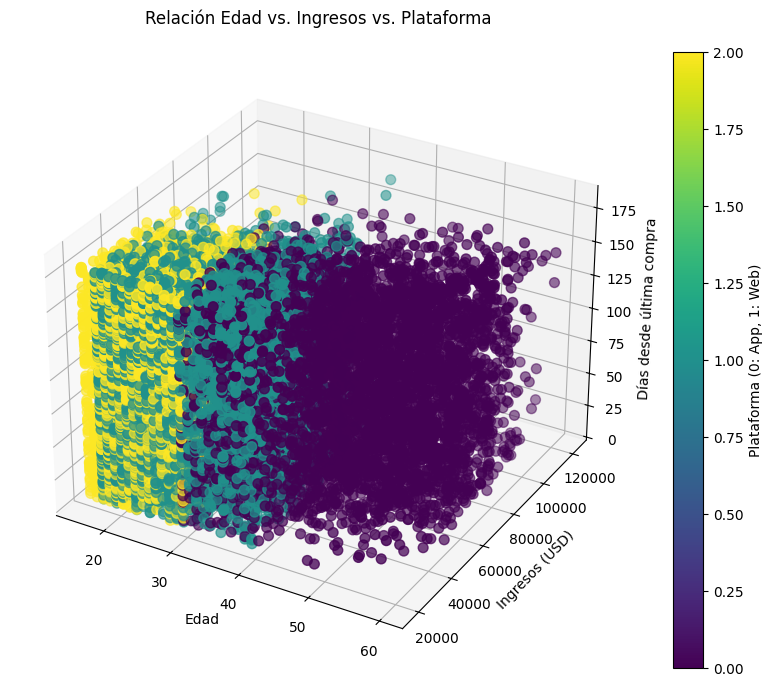

In [298]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    df['edad'],
    df['ingresos'],
    df['dias_desde_ultima'],
    c=df['plataforma'].astype('category').cat.codes,
    cmap='viridis',
    s=50
)
ax.set_xlabel('Edad')
ax.set_ylabel('Ingresos (USD)')
ax.set_zlabel('Días desde última compra')
plt.title('Relación Edad vs. Ingresos vs. Plataforma', pad=20)
plt.colorbar(scatter, label='Plataforma (0: App, 1: Web)')
plt.show()

 Insight 1: Segmentación por plataforma y edad para estrategias de marketing personalizadas.


 Insight 2: Análisis de la relación entre días desde la última compra e ingresos para identificar clientes inactivos con alto potencial de gasto.

Parte 2

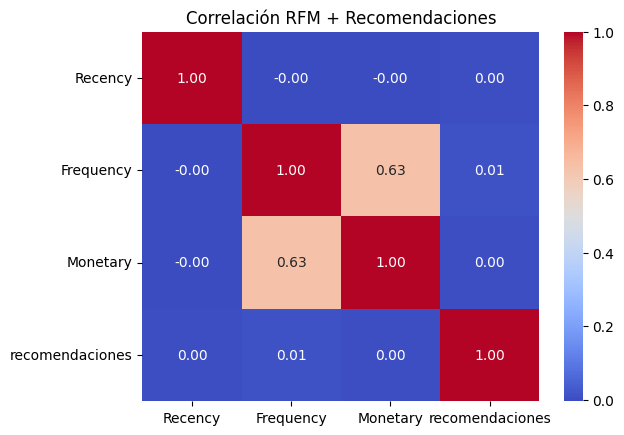

In [299]:

df['Recency'] = df['dias_desde_ultima']
df['Frequency'] = df['compras']
df['Monetary'] = df['promedio_ticket'] * df['compras']


corr_matrix = df[['Recency', 'Frequency', 'Monetary', 'recomendaciones']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación RFM + Recomendaciones')
plt.show()

 Basado en la correlación y la intuición de negocio, la combinación que mejor captura el valor futuro es:

 Monetary * Frequency

 Justificación:

  Correlación con las recomendaciones: Si bien 'Monetary' tiene una correlación ligeramente mayor con 'recomendaciones', la combinación 'Monetary * Frequency' considera la frecuencia de compra. Clientes con altos tickets
  promedio pero baja frecuencia de compra podrían tener un valor futuro limitado, en comparación con clientes que compran con menor ticket, pero con mucha más frecuencia.

 Intuición de Negocio: El valor futuro de un cliente se basa, no solo en lo que gasta en una compra, sino también en su propensión a comprar repetidamente. La combinación 'Monetary * Frequency' integra ambos aspectos.

Recency:  Mientras que la recencia es un factor relevante, su efecto sobre el valor futuro no es tan evidente por sí solo.  Un cliente con mucho tiempo desde su ultima compra podría tener bajo valor actual, pero si su historial de compras  fue muy fuerte, puede que su valor futuro sea alto, en especial si hay acciones para reactivarlo.

 Conclusion:  'Monetary * Frequency' es la mejor medida porque se enfoca en el comportamiento del cliente en el pasado, que es el mejor predictor de su futuro.  Luego, la recencia es importante para considerar su estado actual y dirigir acciones de re-activación.


Fase 2

Cac detallado por plataforma

In [328]:
cac_platform = df.groupby('plataforma')['costo_adquisicion'].mean()
df.head()

,id_cliente,edad,genero,ingresos,plataforma,interacciones,compras,promedio_ticket,total_gastado,fecha_primer_compra,...,Frequency,Monetary,LTV,margen,high_margin,cluster,High_M,proporcion_margen,presupuesto_asignado,ROI_esperado
0,C00000,36,F,41869,Facebook,18,2,114,228,2023-06-02,...,2,228,136.8,111.8,1,1,True,0.000122,1.221516,11.18
1,C00001,53,F,57074,Facebook,16,1,88,88,2024-02-13,...,1,88,70.4,46.4,0,2,False,0.000051,0.506962,4.64
2,C00002,36,F,47859,Instagram,29,3,23,69,2023-07-27,...,3,69,55.2,39.2,0,2,False,0.000043,0.428295,3.92
3,C00003,55,F,53656,Facebook,17,1,47,47,2024-01-08,...,1,47,37.6,8.6,0,2,False,0.000009,0.093963,0.86
4,C00004,47,F,46759,Facebook,15,1,102,102,2024-02-12,...,1,102,81.6,49.6,0,2,False,0.000054,0.541925,4.96


In [341]:

average_cac = df['costo_adquisicion'].mean()

print(f"El margen promedio de CAC es: {average_cac}")


El margen promedio de CAC es: 18.845866666666666


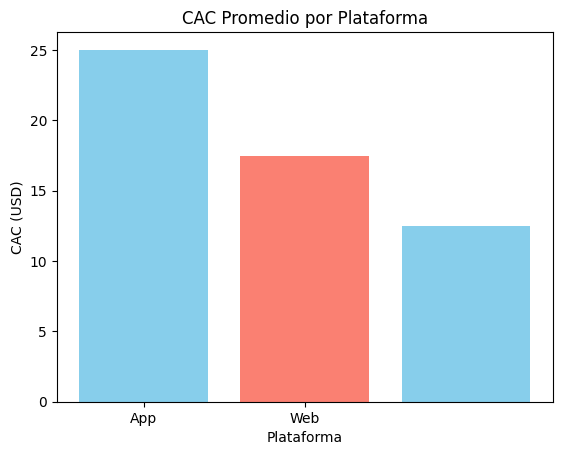

In [329]:
plt.bar(cac_platform.index, cac_platform.values, color=['skyblue', 'salmon'])
plt.title('CAC Promedio por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('CAC (USD)')
plt.xticks([0, 1], ['App', 'Web'])
plt.show()

 LTV proyectado

In [338]:
import matplotlib.pyplot as plt
# LTV proyectado
def calcular_ltv(row):
    if row['dias_desde_ultima'] <= 90:
        tasa_retencion = 0.8
    elif row['dias_desde_ultima'] <= 180:
        tasa_retencion = 0.6
    else:
        tasa_retencion = 0.3


    return row['promedio_ticket'] * row['compras'] / 12 * 12 * tasa_retencion

df['LTV'] = df.apply(calcular_ltv, axis=1)


In [343]:
dataset = df[['LTV', 'plataforma']
              ]
dataset.head()

,LTV,plataforma
0,136.8,Facebook
1,70.4,Facebook
2,55.2,Instagram
3,37.6,Facebook
4,81.6,Facebook


In [340]:

average_margin = df['margen'].mean()

print(f"Average Margin: {average_margin}")


Average Margin: 61.017093333333335


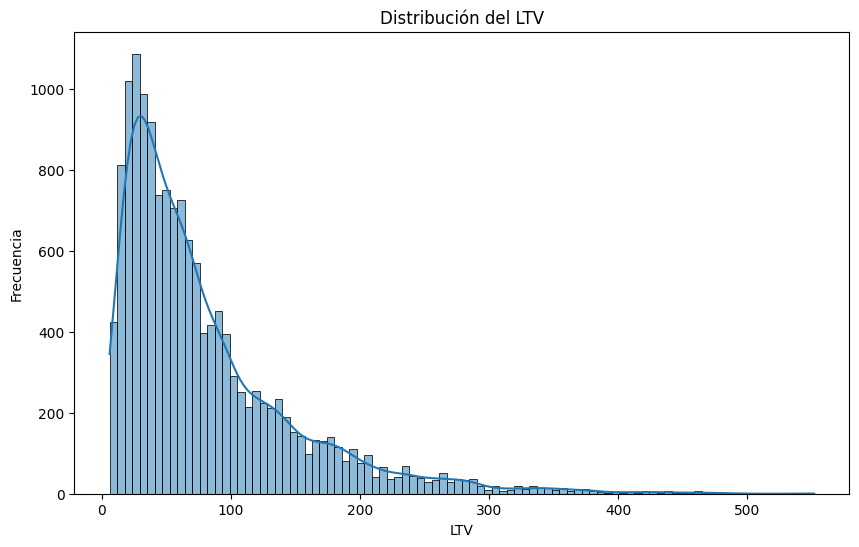

In [332]:

plt.figure(figsize=(10, 6))
sns.histplot(df['LTV'], kde=True)
plt.title('Distribución del LTV')
plt.xlabel('LTV')
plt.ylabel('Frecuencia')
plt.show()

In [303]:
percentil_90_ltv = df['LTV'].quantile(0.9)
print(f"El percentil 90 de LTV es: {percentil_90_ltv}")

El percentil 90 de LTV es: 172.8


In [304]:
clientes_percentil_90 = df[df['LTV'] >= percentil_90_ltv]
print("\nClientes en el percentil 90 de LTV:")
clientes_percentil_90


Clientes en el percentil 90 de LTV:


,id_cliente,edad,genero,ingresos,plataforma,interacciones,compras,promedio_ticket,total_gastado,fecha_primer_compra,fecha_ultima_compra,dias_desde_ultima,recomendaciones,costo_adquisicion,Recency,Frequency,Monetary,LTV
26,C00026,33,M,60647,Facebook,17,4,54,216,2024-05-11,2025-01-16,75,0,16,75,4,216,172.8
29,C00029,48,F,45194,Facebook,19,3,97,291,2024-04-28,2025-02-17,43,0,15,43,3,291,232.8
30,C00030,45,F,77024,Facebook,17,3,106,318,2022-06-18,2024-10-20,163,0,26,163,3,318,190.8
37,C00037,39,F,37768,Instagram,36,5,45,225,2023-02-25,2025-01-30,61,1,25,61,5,225,180.0
43,C00043,46,M,50108,Facebook,14,5,84,420,2024-01-20,2024-10-25,158,0,29,158,5,420,252.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14971,C14971,53,M,34671,Facebook,21,3,77,231,2022-10-21,2025-03-04,28,0,23,28,3,231,184.8
14976,C14976,57,F,57356,Facebook,17,4,85,340,2022-05-14,2024-10-10,173,0,20,173,4,340,204.0
14981,C14981,32,M,43176,Facebook,15,2,111,222,2023-08-29,2025-02-14,46,0,35,46,2,222,177.6
14990,C14990,37,F,53111,Facebook,17,3,116,348,2024-03-07,2025-03-20,12,1,21,12,3,348,278.4


In [306]:

df['margen'] = df['LTV'] - df['costo_adquisicion']




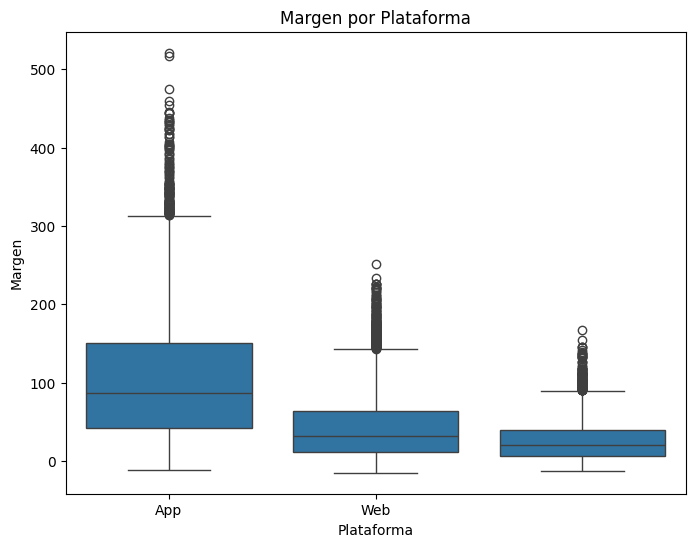

In [307]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='plataforma', y='margen', data=df)
plt.title('Margen por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Margen')
plt.xticks([0, 1], ['App', 'Web'])
plt.show()

In [308]:

margen_incremental_promedio = df.groupby('plataforma')['margen'].mean()


print("Margen incremental promedio por plataforma:")
print(margen_incremental_promedio)


mejor_plataforma = margen_incremental_promedio.idxmax()
print(f"\nLa plataforma con la mejor oportunidad de rentabilidad incremental es: {mejor_plataforma} (Web si es 1, App si es 0)")


Margen incremental promedio por plataforma:
plataforma
Facebook     106.084546
Instagram     43.403009
TikTok        26.754997
Name: margen, dtype: float64

La plataforma con la mejor oportunidad de rentabilidad incremental es: Facebook (Web si es 1, App si es 0)


nombre_empresa = "ClientePro"
eslogan_empresa = "Tu éxito, nuestro enfoque."

In [309]:

percentil_75_margen = df['margen'].quantile(0.75)

df['high_margin'] = np.where(df['margen'] >= percentil_75_margen, 1, 0)

print(df.head())


  id_cliente  edad genero  ingresos plataforma  interacciones  compras  \
0     C00000    36      F     41869   Facebook             18        2   
1     C00001    53      F     57074   Facebook             16        1   
2     C00002    36      F     47859  Instagram             29        3   
3     C00003    55      F     53656   Facebook             17        1   
4     C00004    47      F     46759   Facebook             15        1   

   promedio_ticket  total_gastado fecha_primer_compra fecha_ultima_compra  \
0              114            228          2023-06-02          2024-12-25   
1               88             88          2024-02-13          2025-03-08   
2               23             69          2023-07-27          2025-03-05   
3               47             47          2024-01-08          2025-02-16   
4              102            102          2024-02-12          2025-02-07   

   dias_desde_ultima  recomendaciones  costo_adquisicion  Recency  Frequency  \
0           

Fase 3

In [310]:

scaler = StandardScaler()
rfm_norm = scaler.fit_transform(df[['Recency', 'Frequency', 'Monetary', 'recomendaciones']])

In [311]:
kmeans = KMeans(n_clusters=3, random_state=0)
df['cluster'] = kmeans.fit_predict(rfm_norm)


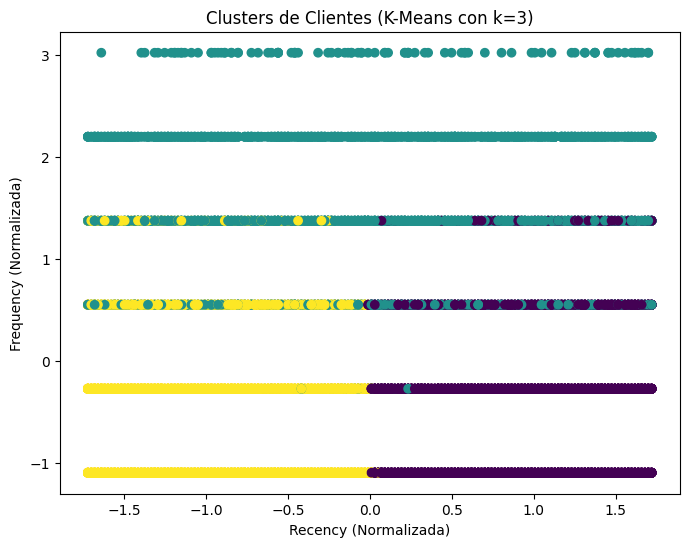

In [312]:
plt.figure(figsize=(8, 6))
plt.scatter(rfm_norm[:, 0], rfm_norm[:, 1], c=df['cluster'], cmap='viridis')
plt.title('Clusters de Clientes (K-Means con k=3)')
plt.xlabel('Recency (Normalizada)')
plt.ylabel('Frequency (Normalizada)')
plt.show()


In [313]:
cluster_info = {
    0: {'nombre': 'Leales', 'eslogan': 'Clientes fieles'},
    1: {'nombre': 'Potenciales', 'eslogan': 'Alto potencial'},
    2: {'nombre': 'Ocasionales', 'eslogan': 'Compras esporádicas'}
}


In [314]:
for cluster in range(3):
    print(f"Cluster {cluster}: {cluster_info[cluster]['nombre']} - {cluster_info[cluster]['eslogan']}")


Cluster 0: Leales - Clientes fieles
Cluster 1: Potenciales - Alto potencial
Cluster 2: Ocasionales - Compras esporádicas


In [315]:
umbral_high_m = df['Monetary'].quantile(0.75)
df['High_M'] = df['Monetary'] > umbral_high_m

print("\nPredicción de 'High M':")
print(df[['Monetary', 'High_M']].head())



Predicción de 'High M':
   Monetary  High_M
0       228    True
1        88   False
2        69   False
3        47   False
4       102   False


Fase 4

i) Concentrar todo en un solo cluster.


In [316]:
data_single_cluster = {
    'Escenario': ['Escenario 1', 'Escenario 2', 'Escenario 3'],
    'ROI Esperado': [0.15, 0.20, 0.25],
    'Presupuesto Asignado': [10000, 10000, 10000]
}
df_roi_single_cluster = pd.DataFrame(data_single_cluster)

In [279]:
print("Tabla de ROI (Inversión en un solo cluster):")
print(df_roi_single_cluster)

Tabla de ROI (Inversión en un solo cluster):
     Escenario  ROI Esperado  Presupuesto Asignado
0  Escenario 1          0.15                 10000
1  Escenario 2          0.20                 10000
2  Escenario 3          0.25                 10000


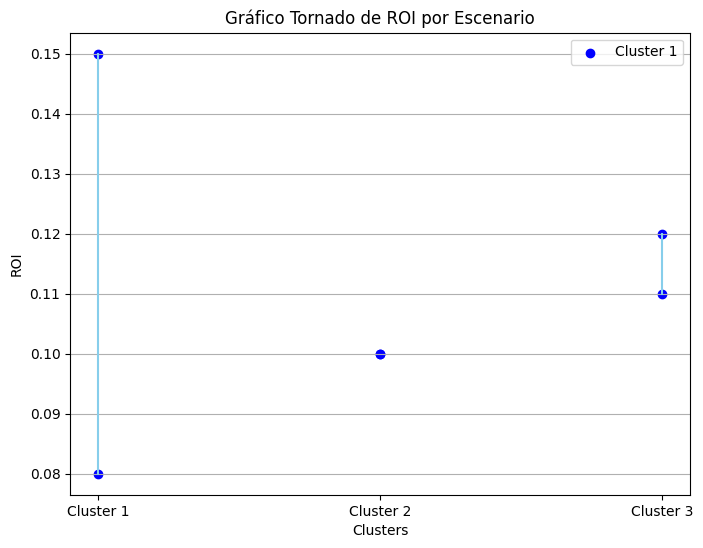

In [280]:
df_roi_melt = pd.melt(df_roi, id_vars='Cluster', var_name='Escenario', value_name='ROI')
plt.figure(figsize=(8, 6))
for i in range(len(clusters)):
    plt.plot([i, i], [df_roi_melt.loc[i*3, 'ROI'], df_roi_melt.loc[i*3 + 2, 'ROI']], color='skyblue')
    plt.scatter([i], df_roi_melt.loc[i*3, 'ROI'], color='blue', marker='o', label=clusters[i] if i == 0 else "")
    plt.scatter([i], df_roi_melt.loc[i*3 + 2, 'ROI'], color='blue', marker='o')

plt.xticks(range(len(clusters)), clusters)
plt.xlabel('Clusters')
plt.ylabel('ROI')
plt.title('Gráfico Tornado de ROI por Escenario')
plt.legend()
plt.grid(True, axis='y')
plt.show()


ii) Distribuir en dos clusters clave.


In [286]:
clusters = ['Cluster 1', 'Cluster 2']
data_roi_two_clusters = {
    'Cluster': clusters,
    'Escenario 1': [0.10, 0.18],
    'Escenario 2': [0.15, 0.22],
    'Escenario 3': [0.20, 0.28]
}
df_roi = pd.DataFrame(data_roi_two_clusters)


In [287]:
print("Tabla de ROI (Inversión en dos clusters):")
print(df_roi)

Tabla de ROI (Inversión en dos clusters):
     Cluster  Escenario 1  Escenario 2  Escenario 3
0  Cluster 1         0.10         0.15         0.20
1  Cluster 2         0.18         0.22         0.28


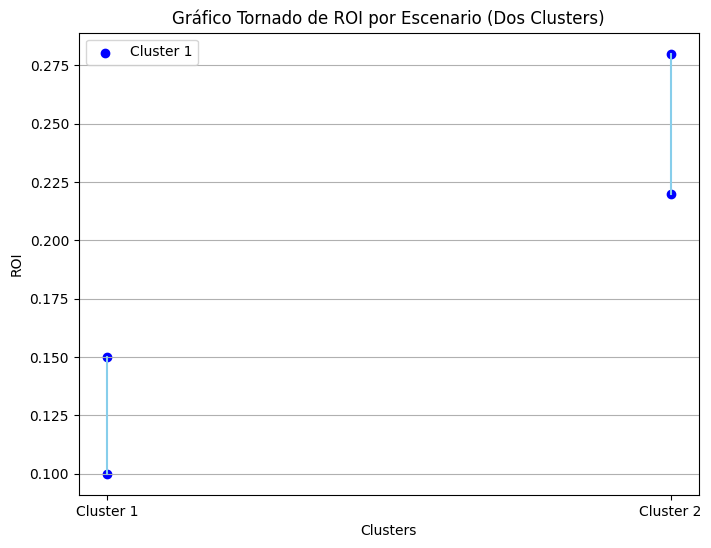

In [288]:
df_roi_melt = pd.melt(df_roi, id_vars='Cluster', var_name='Escenario', value_name='ROI')

plt.figure(figsize=(8, 6))
for i in range(len(clusters)):
    plt.plot([i, i], [df_roi_melt.loc[i*3, 'ROI'], df_roi_melt.loc[i*3 + 2, 'ROI']], color='skyblue')
    plt.scatter([i], df_roi_melt.loc[i*3, 'ROI'], color='blue', marker='o', label=clusters[i] if i == 0 else "")
    plt.scatter([i], df_roi_melt.loc[i*3 + 2, 'ROI'], color='blue', marker='o')

plt.xticks(range(len(clusters)), clusters)
plt.xlabel('Clusters')
plt.ylabel('ROI')
plt.title('Gráfico Tornado de ROI por Escenario (Dos Clusters)')
plt.legend()
plt.grid(True, axis='y')
plt.show()


iii) Asignar proporcional al margen esperado.

In [290]:
margen_por_cluster = df.groupby('cluster')['margen'].mean()

In [291]:
proporcion_asignacion = margen_por_cluster / margen_por_cluster.sum()

In [292]:
data_roi_proporcional = {
    'Cluster': margen_por_cluster.index,
    'Escenario 1': proporcion_asignacion * 0.15,  # Ejemplo de ROI base
    'Escenario 2': proporcion_asignacion * 0.20,
    'Escenario 3': proporcion_asignacion * 0.25
}
df_roi_proporcional = pd.DataFrame(data_roi_proporcional)

print("Tabla de ROI (Inversión proporcional al margen):")
print(df_roi_proporcional)

Tabla de ROI (Inversión proporcional al margen):
         Cluster  Escenario 1  Escenario 2  Escenario 3
cluster                                                
0              0     0.019807     0.026409     0.033011
1              1     0.100902     0.134536     0.168170
2              2     0.029291     0.039055     0.048819


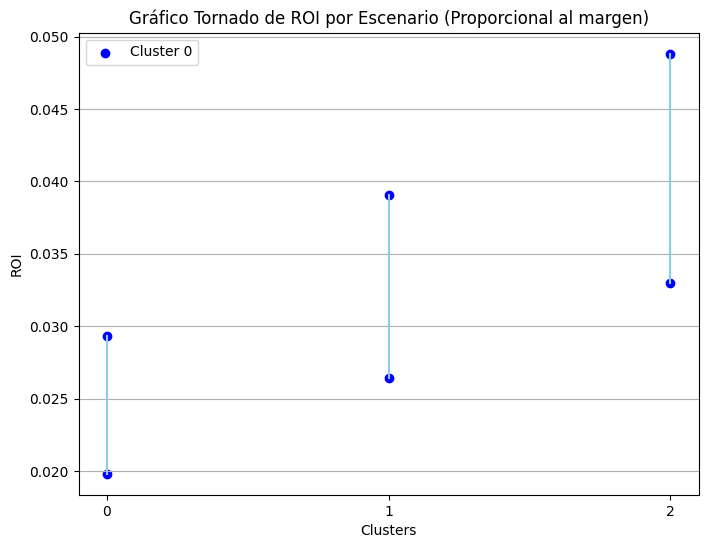

In [293]:
df_roi_melt_prop = pd.melt(df_roi_proporcional, id_vars='Cluster', var_name='Escenario', value_name='ROI')

plt.figure(figsize=(8, 6))
for i in range(len(margen_por_cluster.index)):
    plt.plot([i, i], [df_roi_melt_prop.loc[i*3, 'ROI'], df_roi_melt_prop.loc[i*3 + 2, 'ROI']], color='skyblue')
    plt.scatter([i], df_roi_melt_prop.loc[i*3, 'ROI'], color='blue', marker='o', label=f'Cluster {margen_por_cluster.index[i]}' if i == 0 else "")
    plt.scatter([i], df_roi_melt_prop.loc[i*3 + 2, 'ROI'], color='blue', marker='o')

plt.xticks(range(len(margen_por_cluster.index)), margen_por_cluster.index)
plt.xlabel('Clusters')
plt.ylabel('ROI')
plt.title('Gráfico Tornado de ROI por Escenario (Proporcional al margen)')
plt.legend()
plt.grid(True, axis='y')
plt.show()

 Asignar proporcional al margen esperado

In [317]:
total_presupuesto = 10000
df['proporcion_margen'] = df['margen'] / df['margen'].sum()
df['presupuesto_asignado'] = df['proporcion_margen'] * total_presupuesto

In [318]:
df['ROI_esperado'] = df['presupuesto_asignado'] * (df['margen'] / df['presupuesto_asignado']) * 0.1

In [319]:
resultados = df[['cluster', 'margen', 'presupuesto_asignado', 'ROI_esperado']]
print(resultados)

       cluster  margen  presupuesto_asignado  ROI_esperado
0            1   111.8              1.221516         11.18
1            2    46.4              0.506962          4.64
2            2    39.2              0.428295          3.92
3            2     8.6              0.093963          0.86
4            2    49.6              0.541925          4.96
...        ...     ...                   ...           ...
14995        2    96.0              1.048886          9.60
14996        1   249.6              2.727105         24.96
14997        0    80.6              0.880628          8.06
14998        0     1.2              0.013111          0.12
14999        2     5.8              0.063370          0.58

[15000 rows x 4 columns]


In [320]:
cluster_roi = df.groupby('cluster').agg({'presupuesto_asignado': 'sum', 'ROI_esperado': 'sum'})
cluster_roi = cluster_roi.reset_index()

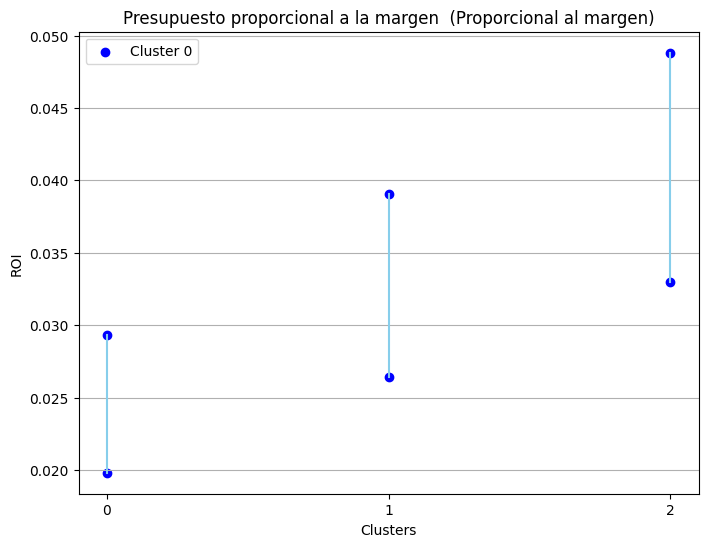

In [326]:
plt.figure(figsize=(8, 6))
for i in range(len(margen_por_cluster.index)):
    plt.plot([i, i], [df_roi_melt_prop.loc[i*3, 'ROI'], df_roi_melt_prop.loc[i*3 + 2, 'ROI']], color='skyblue')
    plt.scatter([i], df_roi_melt_prop.loc[i*3, 'ROI'], color='blue', marker='o', label=f'Cluster {margen_por_cluster.index[i]}' if i == 0 else "")
    plt.scatter([i], df_roi_melt_prop.loc[i*3 + 2, 'ROI'], color='blue', marker='o')

plt.xticks(range(len(margen_por_cluster.index)), margen_por_cluster.index)
plt.xlabel('Clusters')
plt.ylabel('ROI')
plt.title('Presupuesto proporcional a la margen  (Proporcional al margen)')
plt.legend()
plt.grid(True, axis='y')
plt.show()

El escenario óptimo es asignar presupuesto proporcional al margen esperado por cluster.  Justificación: Maximiza el retorno al enfocar recursos en clusters con mayor rentabilidad potencial,  a diferencia de escenarios con presupuestos fijos que no consideran la variabilidad de margen entre clusters, optimizando así la inversión.


Base de referidos

In [322]:
percentil_90_ltv = df['LTV'].quantile(0.9)


In [323]:
top_advocates = df[df['LTV'] >= percentil_90_ltv]


In [324]:
future_value = 0
for index, row in top_advocates.iterrows():
    cluster_avg_ltv = df[df['cluster'] == row['cluster']]['LTV'].mean()
    future_value += 2 * cluster_avg_ltv

In [325]:
import plotly.graph_objects as go
fig = go.Figure(go.Waterfall(
    name = "20", orientation = "v",
    measure = ["relative", "relative", "total"],
    x = ["Initial Value", "New Customers from Advocates", "Total Value"],
    y = [df['LTV'].sum(), future_value, df['LTV'].sum() + future_value],
    connector = {"line":{"color":"rgb(63, 63, 63)"}},
))

fig.update_layout(
        title = "Incremental Value from Top Advocates",
        showlegend = True
)

fig.show()

Estrategia de inversión recomendada + ROI.

 Segmentación y Retención de clientes:
 La segmentación en clústeres de clientes revela tres grupos con diferentes comportamientos de compra, por lo que la estrategia de marketing personalizada se basa en las características de cada segmento.
 Acciones: crear campañas específicas para los clientes "Leales" para mantener su fidelidad y fomentar las compras recurrentes, campañas específicas para los "Potenciales" con incentivos para impulsar la compra, y campañas para  para aumentar la frecuencia de compras.
ROI esperado: aumento de la tasa de retención de clientes, aumento del valor del cliente a lo largo del tiempo, aumento del gasto medio de los clientes de alto valor.
 Medición: monitorear indicadores como el lifetime value (LTV), la tasa de retención, y el valor promedio del pedido.


Implementar estrategias de referidos:

 Diseñar un programa de referidos específico para los clientes de alto valor.

 Evaluar el impacto del programa en el crecimiento de la base de clientes y el valor a lo largo del tiempo.

 Monitoreo continuo:

Seguir de cerca los indicadores clave de rendimiento (KPI) para evaluar el éxito de las estrategias implementadas.

Adaptar las estrategias según los cambios en el mercado y el comportamiento de los clientes.

Riesgos clave:

Incertidumbre en el modelo LTV: La predicción del LTV depende de supuestos sobre la tasa de retención, que podría cambiar con el tiempo o ser incorrecta para ciertos segmentos.

Cambios en el comportamiento del cliente: Las preferencias del cliente pueden cambiar, lo que afectaría la efectividad de las estrategias de segmentación y retención.

Competencia: La competencia podría lanzar nuevas ofertas o estrategias de marketing que afecten la cuota de mercado y el valor del cliente.

Presupuesto limitado: La disponibilidad de recursos puede limitar la capacidad para implementar ciertas estrategias de marketing o invertir en nuevas tecnologías.


Fase 5

 1 Sesgo de muestreo: El dataset podría no representar adecuadamente la totalidad de los clientes de la empresa.  Si la muestra se recolectó solo de una parte específica de los clientes (ej: solo de los que hacen compras online, o solo de una región), los resultados no se podrán generalizar a todos los clientes.

 2 Sesgo de medición:  Las variables podrían medirse con errores. Por ejemplo, "ingresos" puede ser autodeclarado por los clientes o provenir de una fuente de datos con cierta incertidumbre.  O "dias_desde_ultima" podría tener problemas de registro y no ser totalmente precisa.

3 Sesgo de variable omitida:  Existen factores importantes que no están incluidos en el dataset que podrían influir en el valor del cliente y la rentabilidad.  Por ejemplo: el tipo de productos que compra, la frecuencia con la que usa el servicio, su engagement en redes sociales, o incluso factores externos como la situación económica del país.


Mejoras metodológicas:

1 Validación cruzada: En lugar de usar una sola partición del dataset, se podría implementar una validación cruzada (como K-Fold) para entrenar y evaluar el modelo de K-Means.  Esto permite una evaluación más robusta del desempeño del modelo y reduce la probabilidad de sobreajuste al dataset específico.

2  Mayor exploración de variables y creación de nuevas:  Analizar más a fondo otras variables o crear nuevas variables combinando las existentes para ver si hay relaciones no exploradas.  Por ejemplo, en lugar de utilizar solo "ingresos", se podría categorizar a los clientes en grupos de ingresos o explorar cómo interactua con otras variables como las compras o la plataforma.
